<a href="https://colab.research.google.com/github/RonitT1234/Obesity_Research_Project/blob/main/RonitResearchProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

New Research Question: What kind of factors contribute to persons obesity level and how well can it be classfied using an unsupervised PCA model?

Old Research Question:"How well can a a a person’s obesity level be predicted based off their habits and physical condition using some model?

What kind of factors contribute

Kmeans
PCA
t-SNE

> Add blockquote



Adding the CSV dataset:

In [30]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/RonitT1234/Obesity_Research_Project/refs/heads/main/ObesityDataSet_raw_and_data_sinthetic.csv')


Overview of the dataset:

In [31]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Checking for any missing data values with .info():

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Graphing Box plots of each variable to check for any extreme outliers:

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
label_encoder = LabelEncoder()
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])


In [35]:
df_encoded.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


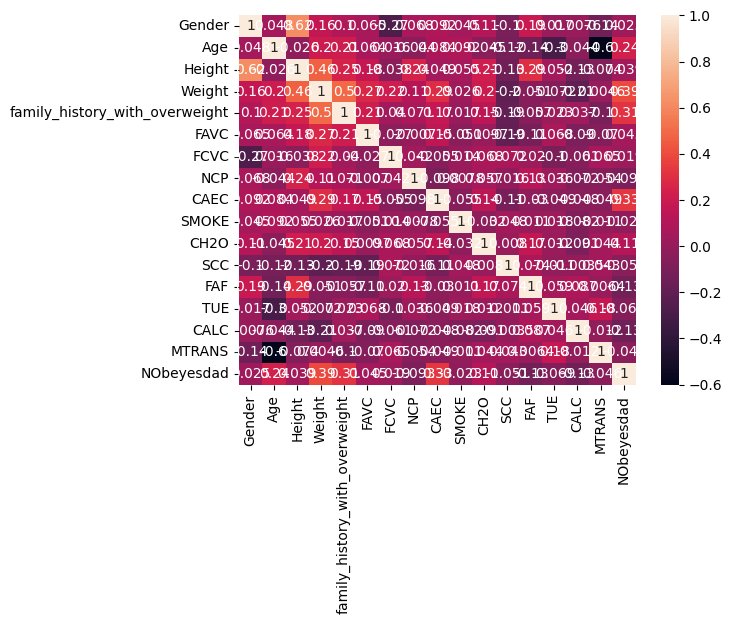

In [36]:
corr=df_encoded.corr()
sns.heatmap(corr,annot=True)
plt.show()

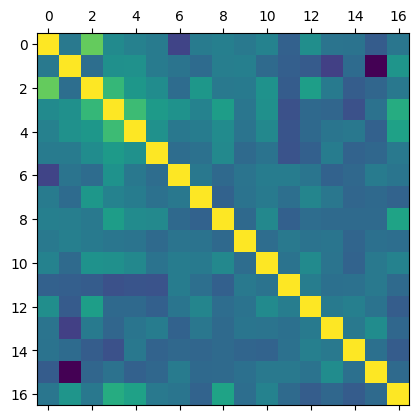

In [37]:
#get rid of
plt.matshow(df_encoded.corr())
plt.show()

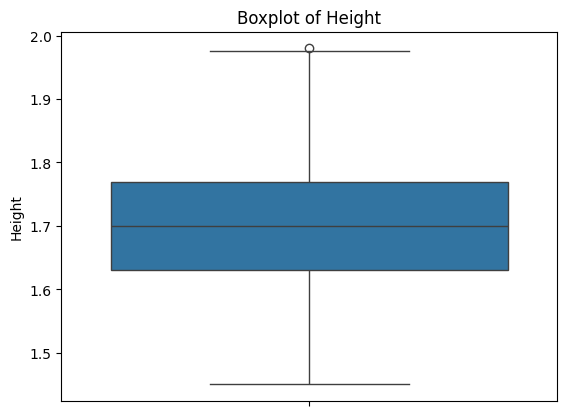

In [38]:
column=2
sns.boxplot(y=df.iloc[:, column])
plt.ylabel(df.columns[column])
plt.title(f'Boxplot of {df.columns[column]}')
plt.show()

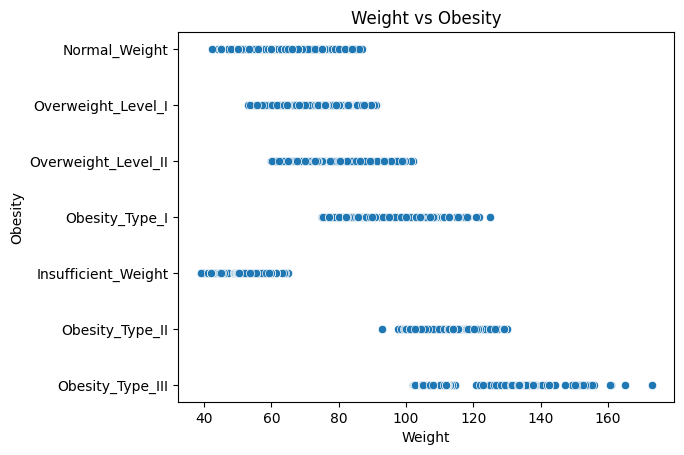

In [39]:
sns.scatterplot(x='Weight', y='NObeyesdad', data=df)
plt.xlabel('Weight')
plt.ylabel('Obesity')
plt.title('Weight vs Obesity')
plt.show()

More Graphs

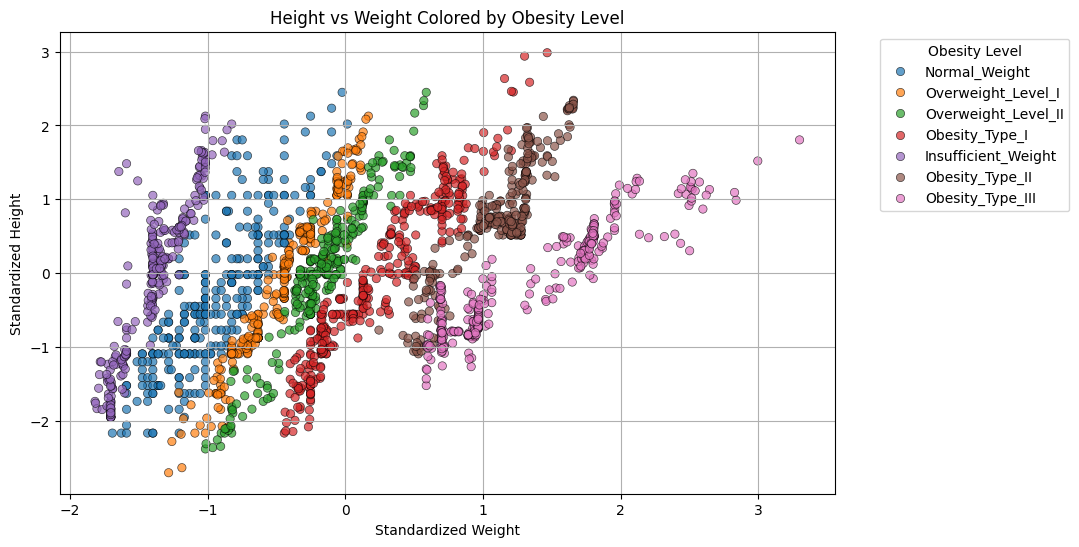

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Weight', 'Height']] = scaler.fit_transform(df[['Weight', 'Height']])


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Weight', y='Height', hue='NObeyesdad', palette='tab10', edgecolor='k', alpha=0.7)

plt.title("Height vs Weight Colored by Obesity Level")
plt.xlabel("Standardized Weight")
plt.ylabel("Standardized Height")
plt.legend(title="Obesity Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
#plt.tight_layout()
plt.show()

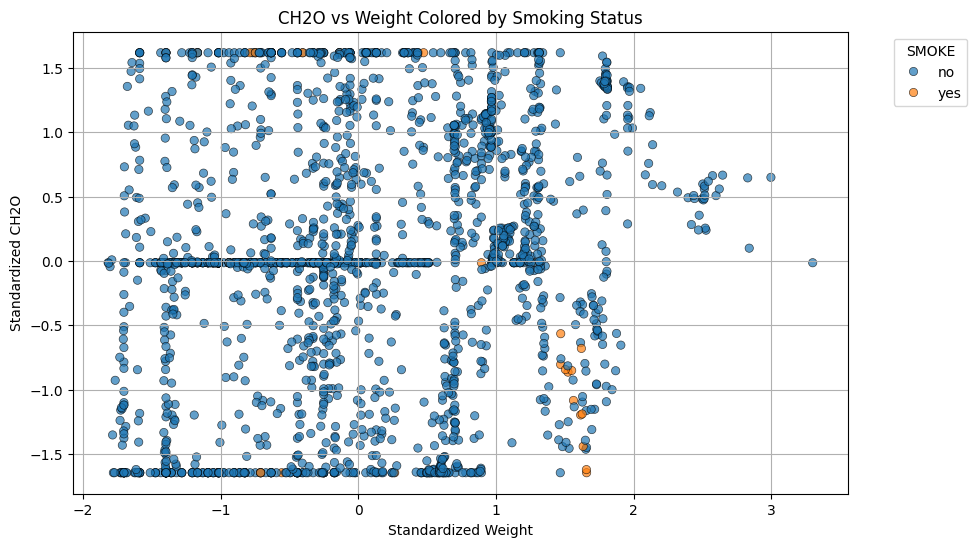

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Weight', 'CH2O']] = scaler.fit_transform(df[['Weight', 'CH2O']])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Weight', y='CH2O', hue='SMOKE', palette='tab10', edgecolor='k', alpha=0.7)

plt.title("CH2O vs Weight Colored by Smoking Status")
plt.xlabel("Standardized Weight")
plt.ylabel("Standardized CH2O")
plt.legend(title="SMOKE", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.optimize import linear_sum_assignment
import numpy as np

Encoding Categorical Variables:

In [80]:
label_encoders = {}
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


Features and Target:

In [81]:
X = df.drop("NObeyesdad", axis=1)
y = df["NObeyesdad"]

Standardizing features:

In [82]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

KMeans with PCA:

In [97]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

kmeans_pca = KMeans(n_clusters=7, random_state=42, n_init=10)
clusters_pca = kmeans_pca.fit_predict(X_pca)

Kmeans without PCA:

In [84]:
kmeans_full = KMeans(n_clusters=7, random_state=42, n_init=10)
clusters_full = kmeans_full.fit_predict(X_scaled)


Graphing with PCA:

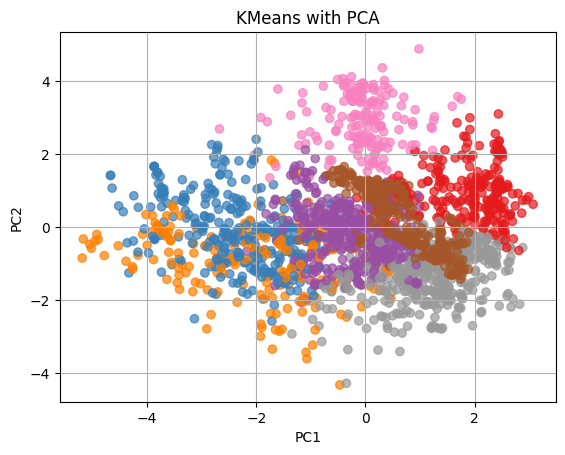

In [107]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_pca, cmap='Set1', alpha=0.7)
plt.title("KMeans with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)


Graphing without PCA:

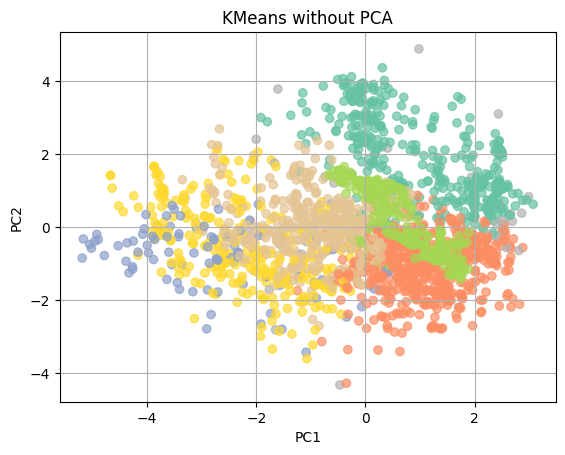

In [109]:
X_full = PCA(n_components=2).fit_transform(X_scaled)
plt.scatter(X_full[:, 0], X_full[:, 1], c=clusters_full, cmap='Set2', alpha=0.7)
plt.title("KMeans without PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)

plt.show()

Actual Dataset:

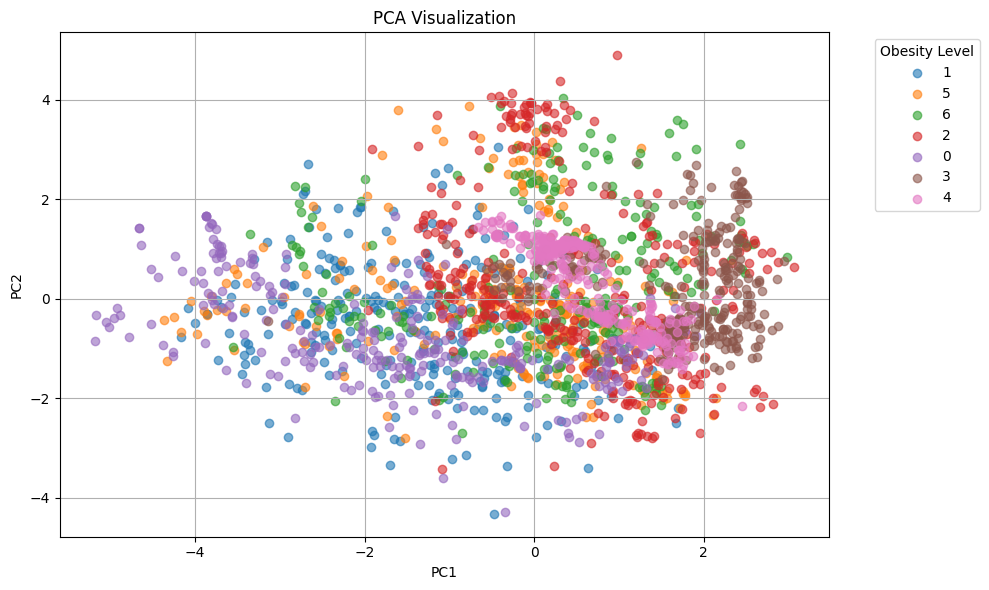

In [110]:
df_pca = pd.DataFrame(X_pca[:, :2], columns=["PC1", "PC2"])
df_pca["Label"] = y.values


##############################################
plt.figure(figsize=(10, 6))
for label in df_pca["Label"].unique():
    subset = df_pca[df_pca["Label"] == label]
    plt.scatter(subset["PC1"], subset["PC2"], label=label, alpha=0.6)
##############################################


plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Visualization")
plt.legend(title="Obesity Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()